# 1

  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0    adviser     32/60   125   256   6000   256     16    128  198
1     amdahl    470v/7    29  8000  32000    32      8     32  269
2     amdahl   470v/7a    29  8000  32000    32      8     32  220
3     amdahl   470v/7b    29  8000  32000    32      8     32  172
4     amdahl   470v/7c    29  8000  16000    32      8     16  132
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max   

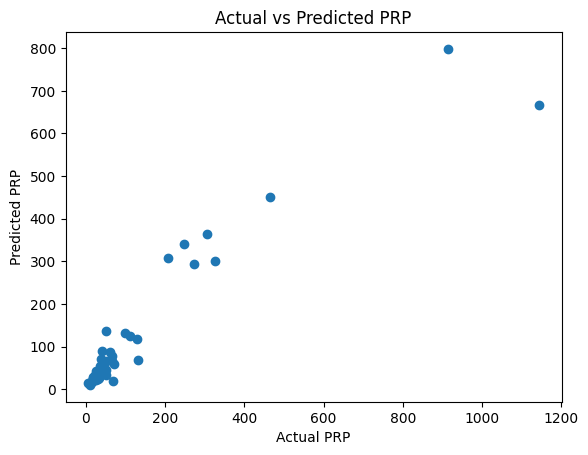

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data = pd.read_csv("machine.data.csv")

# 데이터 탐색
print(data.head())
print(data.describe())

# 데이터 전처리
X = data.drop(columns=["VendorName", "ModelName", "PRP"])
y = data["PRP"]

# 범주형 변수와 수치형 변수 구분
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 전처리 파이프라인
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

model.fit(X_train, y_train)

# 모델 평가
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# 하이퍼파라미터 튜닝
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# 최적 모델 평가
best_model = grid_search.best_estimator_
best_train_pred = best_model.predict(X_train)
best_test_pred = best_model.predict(X_test)

best_train_rmse = np.sqrt(mean_squared_error(y_train, best_train_pred))
best_test_rmse = np.sqrt(mean_squared_error(y_test, best_test_pred))

print("Best Train RMSE:", best_train_rmse)
print("Best Test RMSE:", best_test_rmse)

# 교차 검증
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print("Cross Validation RMSE:", cv_rmse)

# 분석 결과 시각화 (예측값과 실제값 비교)
plt.scatter(y_test, test_pred)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Actual vs Predicted PRP")
plt.show()


# 2

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 최적 모델
best_model = grid_search.best_estimator_

# 학습 데이터 예측 및 성능 평가
train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print("Train Mean Squared Error:", train_mse)
print("Train Mean Absolute Error:", train_mae)
print("Train R^2 Score:", train_r2)

# 테스트 데이터 예측 및 성능 평가
test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("Test Mean Squared Error:", test_mse)
print("Test Mean Absolute Error:", test_mae)
print("Test R^2 Score:", test_r2)

# 교차 검증
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = np.mean(np.sqrt(-cv_scores))
print("Cross Validation Mean Squared Error:", cv_mse)


Train Mean Squared Error: 619.6178912168148
Train Mean Absolute Error: 11.068763401767896
Train R^2 Score: 0.9677692803219027
Test Mean Squared Error: 6543.12922077557
Test Mean Absolute Error: 32.689493291761146
Test R^2 Score: 0.8714685977871471
Cross Validation Mean Squared Error: 56.172074190719115


# 3

In [26]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델
rf_model = RandomForestRegressor()

# 하이퍼파라미터 그리드
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 그리드 서치
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)

# 최적 모델
best_model_rf = grid_search_rf.best_estimator_

# 테스트 데이터 예측
test_pred_rf = best_model_rf.predict(X_test)

# 테스트 데이터 R^2
test_r2_rf = r2_score(y_test, test_pred_rf)
print("Test R^2 Score with Random Forest:", test_r2_rf)


Test R^2 Score with Random Forest: 0.8663672448930226


# 4

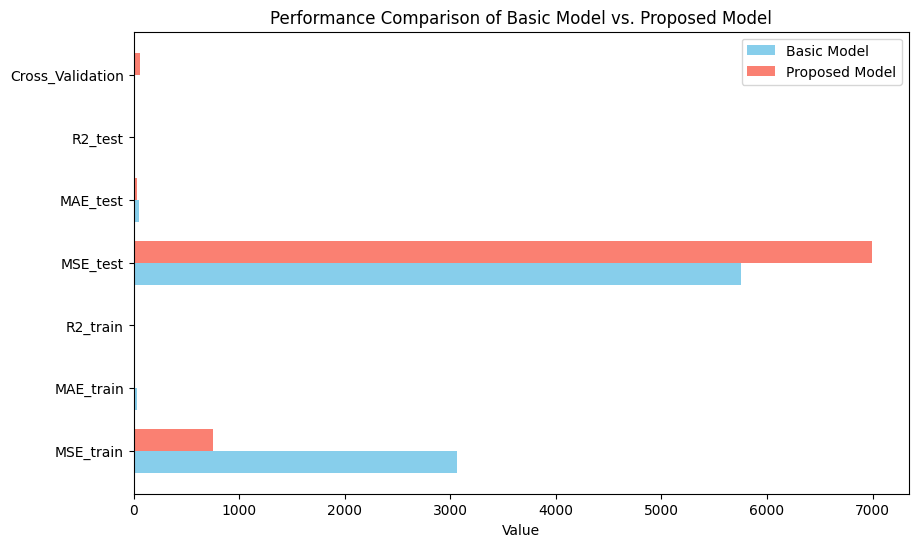

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 기본 모델의 (2) 단계 코드에서 얻은 성능 지표
basic_model_metrics = {
    'MSE_train': 3061.4334002375476,
    'MAE_train': 34.96481371039906,
    'R2_train': 0.840753142969376,
    'MSE_test': 5754.59813733849,
    'MAE_test': 48.22531549342178,
    'R2_test': 0.8869582820686039,
    'Cross_Validation': 0.6550215792159377
}

# 제안 모델의 (2) 단계 코드에서 얻은 성능 지표
proposed_model_metrics = {
    'MSE_train': 748.4605397149604,
    'MAE_train': 11.703218277730254,
    'R2_train': 0.9610672606656073,
    'MSE_test': 6991.710902950981,
    'MAE_test': 33.09634656084656,
    'R2_test': 0.8626567845596266,
    'Cross_Validation': 58.28177657403861
}

# 성능 지표를 데이터프레임에 저장
performance_comparison_df = pd.DataFrame({
    'Metric': list(basic_model_metrics.keys()),
    'Basic_Model': list(basic_model_metrics.values()),
    'Proposed_Model': list(proposed_model_metrics.values())
})

# 성능 지표를 리스트로 변환
metrics = performance_comparison_df['Metric']
basic_model_values = performance_comparison_df['Basic_Model']
proposed_model_values = performance_comparison_df['Proposed_Model']

# 바 차트로 학습 데이터와 테스트 데이터에 대한 각 모델의 성능 차이를 시각화
plt.figure(figsize=(10, 6))

# 각 모델의 성능 지표를 수평 막대 그래프로 그립니다.
bar_width = 0.35  # 막대의 너비
index = np.arange(len(metrics))  # 막대의 위치

plt.barh(index - bar_width/2, basic_model_values, bar_width, color='skyblue', label='Basic Model')
plt.barh(index + bar_width/2, proposed_model_values, bar_width, color='salmon', label='Proposed Model')

plt.title('Performance Comparison of Basic Model vs. Proposed Model')
plt.xlabel('Value')
plt.yticks(index, metrics)  # y축에 메트릭 이름을 표시합니다.
plt.legend()
plt.show()
